# OPERACIONES EN EL HISTOGRAMA

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
image = cv2.imread('SEAH.jpg', cv2.IMREAD_GRAYSCALE)

### DESPLAZAMIENTO

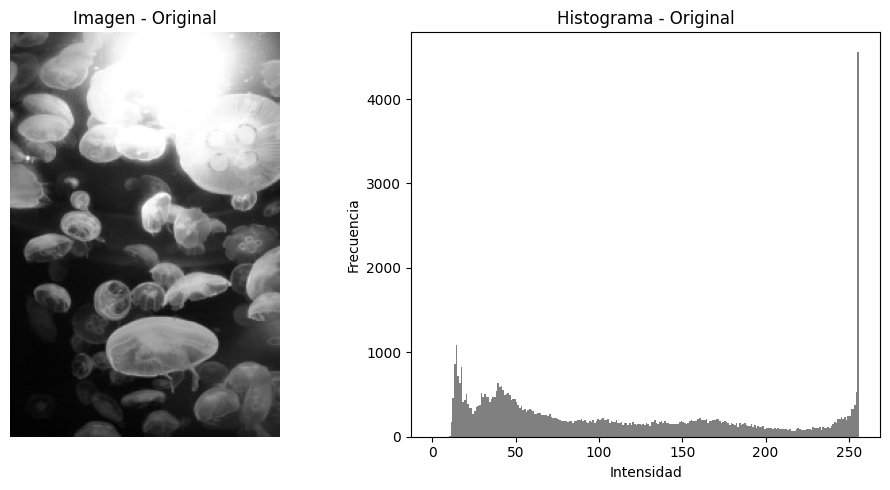

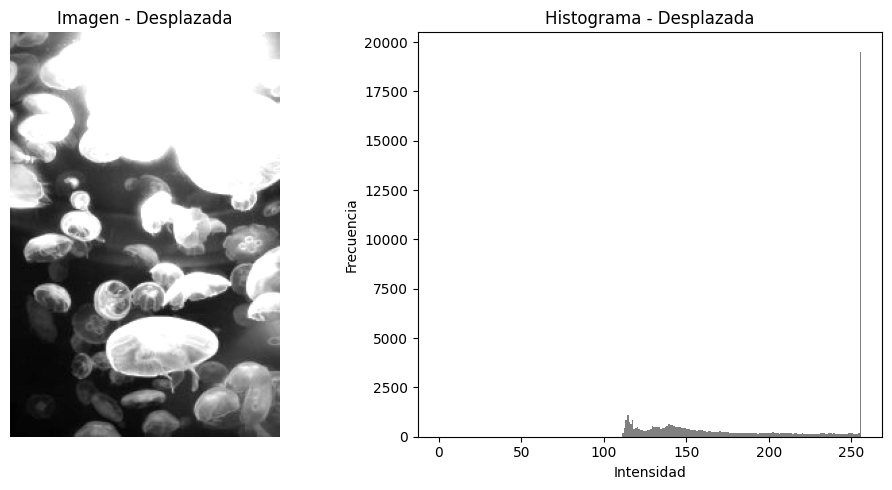

In [3]:
# Desplazamiento del histograma (sumar un valor constante a todos los píxeles)
shift_value = 100
image_shifted = cv2.add(image, shift_value)  # `cv2.add()` para evitar overflow

# Función para graficar imagen y su histograma
def plot_image_and_hist(image, title):
    plt.figure(figsize=(10, 5))
    
    # Mostrar la imagen
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Imagen - {title}')
    plt.axis('off')
    
    # Mostrar el histograma
    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='gray')
    plt.title(f'Histograma - {title}')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()

# Mostrar la imagen y su histograma original
plot_image_and_hist(image, 'Original')

# Mostrar la imagen desplazada y su histograma
plot_image_and_hist(image_shifted, 'Desplazada')


### EXPANSION Y CONTRACCION

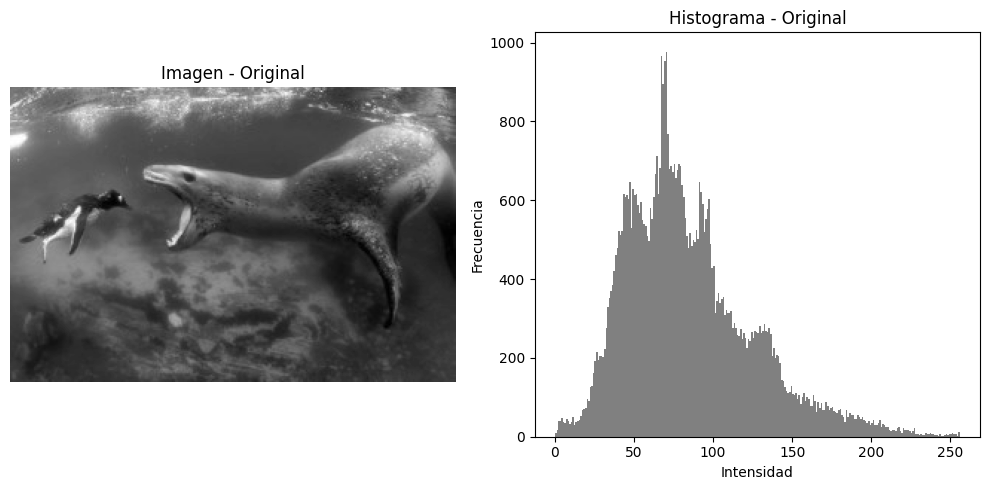

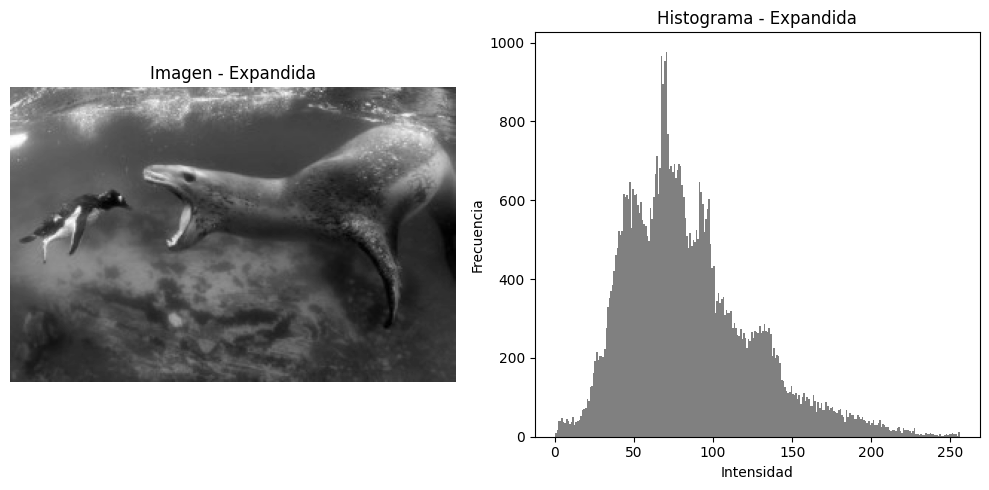

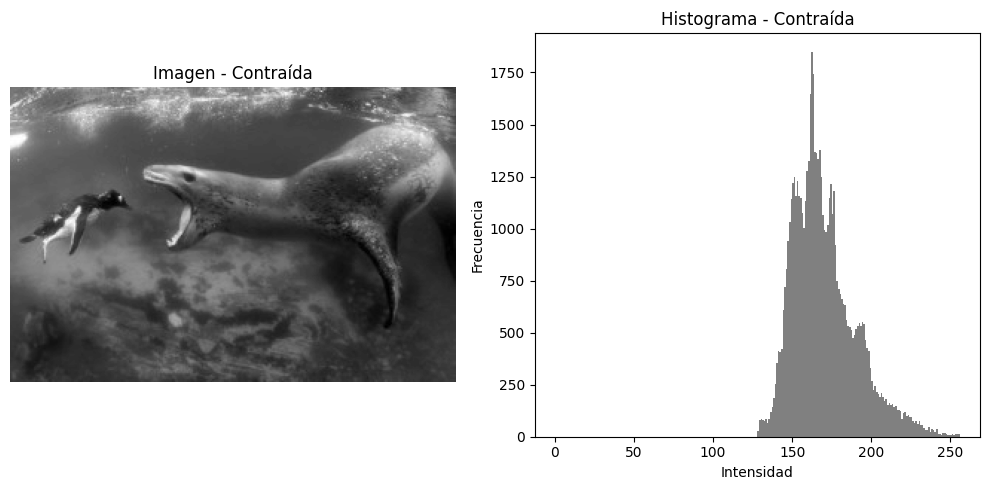

In [6]:
# Expansión del histograma
image_expanded = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# Contracción del histograma
image_contracted = cv2.normalize(image, None, 128, 255, cv2.NORM_MINMAX)

# Mostrar la imagen y su histograma original
plot_image_and_hist(image, 'Original')

# Mostrar la imagen expandida y su histograma
plot_image_and_hist(image_expanded, 'Expandida')

# Mostrar la imagen contraída y su histograma
plot_image_and_hist(image_contracted, 'Contraída')


### IMAGEN DE REFERENCIA

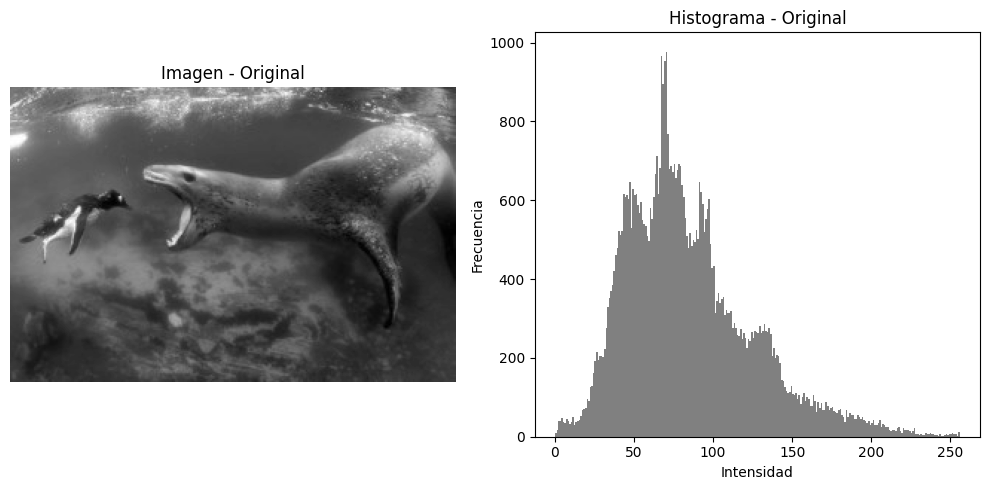

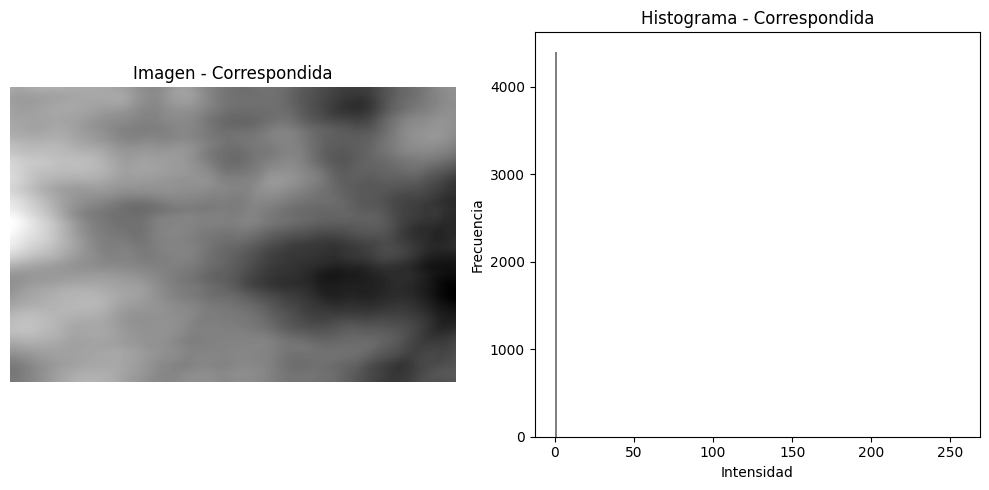

In [11]:
# Cargar una imagen de referencia (debe tener un histograma similar)
reference_image = cv2.imread('AVES.jpg', cv2.IMREAD_GRAYSCALE)

# Realizar la correspondencia de histograma
image_matched = cv2.matchTemplate(image, reference_image, cv2.TM_CCOEFF_NORMED)

# Mostrar la imagen original y su histograma
plot_image_and_hist(image, 'Original')

# Mostrar la imagen con histograma correspondido y su histograma
plot_image_and_hist(image_matched, 'Correspondida')


### OPERACIONES RADIOMETRICAS

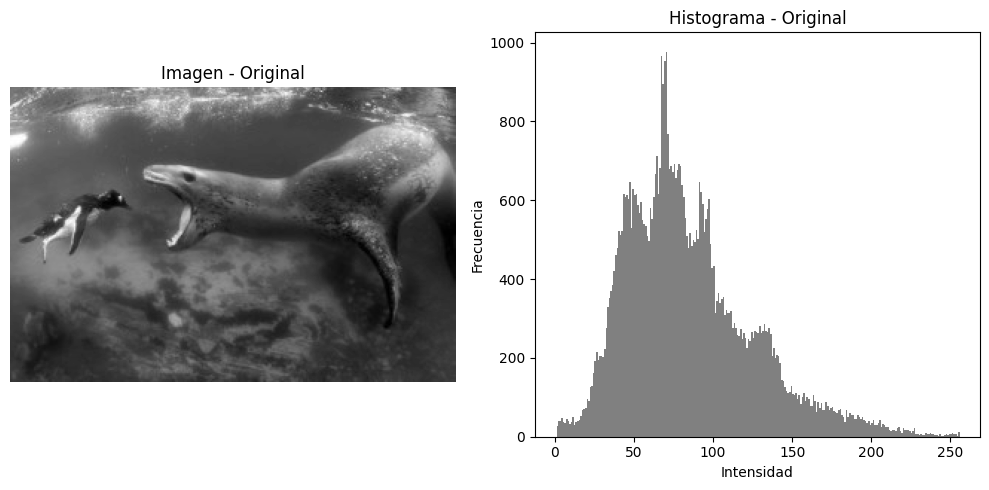

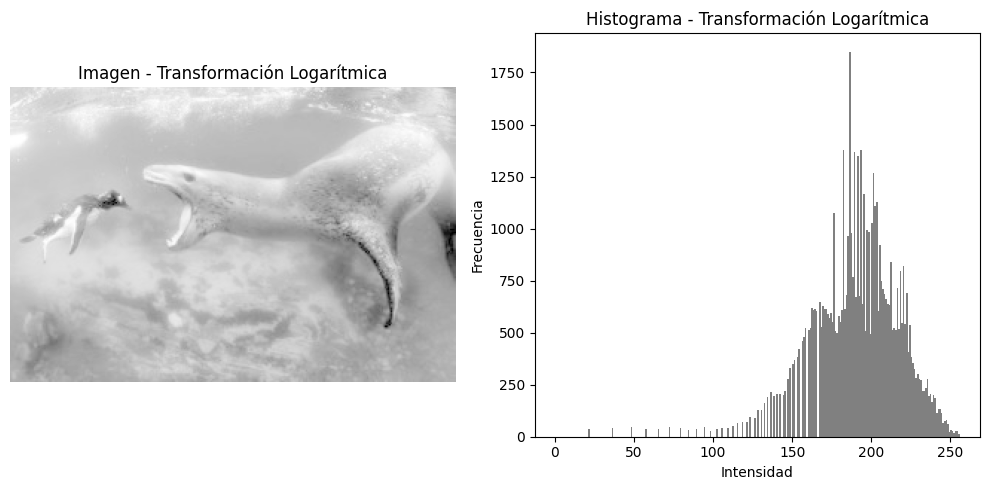

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
image = cv2.imread('SAD.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó correctamente
if image is None:
    print("Error: No se pudo cargar la imagen.")
    exit()

# Evitar valores cero o negativos para la transformación logarítmica
# Asegurarse de que todos los valores sean mayores que 0
image = np.float32(image)  # Convertir la imagen a tipo flotante
image = np.clip(image, 1, 255)  # Asegurarse de que no haya valores 0 o negativos

# Aplicar la transformación logarítmica
image_log = np.log1p(image)  # log(1 + imagen) para evitar log(0)
image_log = cv2.normalize(image_log, None, 0, 255, cv2.NORM_MINMAX)  # Normalizar la imagen

# Función para graficar imagen y su histograma
def plot_image_and_hist(image, title):
    plt.figure(figsize=(10, 5))
    
    # Mostrar la imagen
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Imagen - {title}')
    plt.axis('off')
    
    # Mostrar el histograma
    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='gray')
    plt.title(f'Histograma - {title}')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()

# Mostrar la imagen original y su histograma
plot_image_and_hist(image, 'Original')

# Mostrar la imagen con la transformación logarítmica y su histograma
plot_image_and_hist(image_log, 'Transformación Logarítmica')



### ECUALIZACIÓN

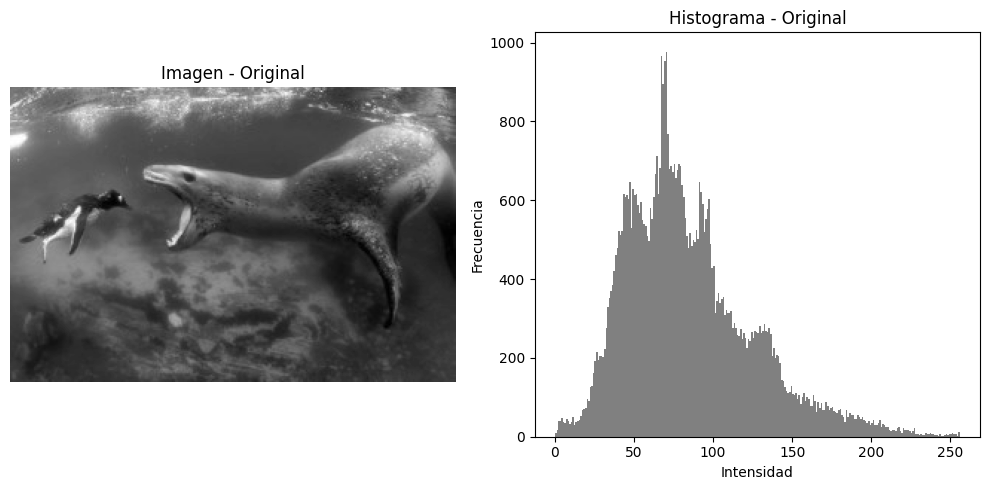

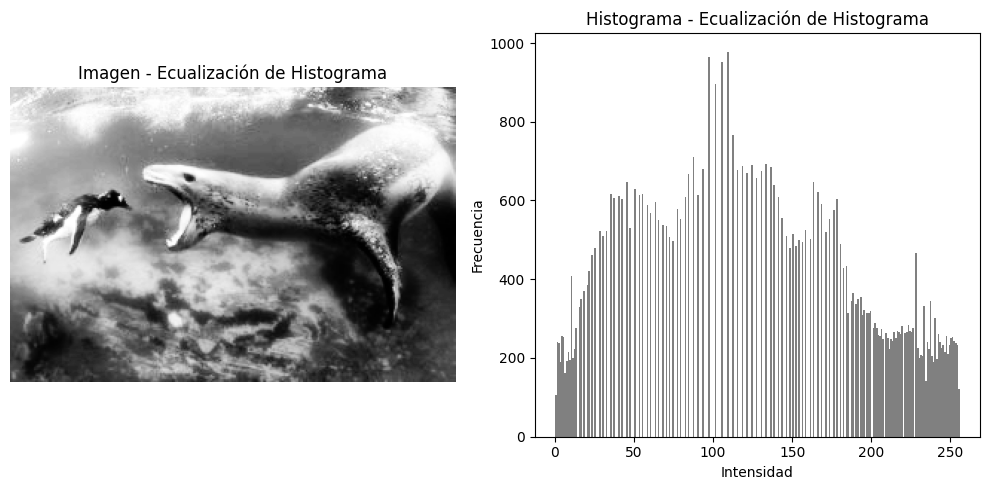

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
image = cv2.imread('SAD.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó correctamente
if image is None:
    print("Error: No se pudo cargar la imagen.")
    exit()


# Ecualización del histograma
image_equalized = cv2.equalizeHist(image.astype(np.uint8))

# Función para graficar imagen y su histograma
def plot_image_and_hist(image, title):
    plt.figure(figsize=(10, 5))
    
    # Mostrar la imagen
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Imagen - {title}')
    plt.axis('off')
    
    # Mostrar el histograma
    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='gray')
    plt.title(f'Histograma - {title}')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()

# Mostrar la imagen original y su histograma
plot_image_and_hist(image.astype(np.uint8), 'Original')

# Mostrar la imagen con ecualización y su histograma
plot_image_and_hist(image_equalized, 'Ecualización de Histograma')
